<h1 style="text-align: center; color: Blue; font-family: verdana; font-size: 40px;">ASME DTOG: Introduction - Design of Experiments (DOE)</h1>

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Design of Experiments](#toc2_)    
- [Full Factorial Design](#toc3_)    
    - [Fundamental Concepts](#toc3_1_1_)    
    - [Example of a Full Factorial Design – JMP Software](#toc3_1_2_)    
      - [Five-Factor Full Factorial](#toc3_1_2_1_)    
      - [ Constructing a Five-Factor Full Factorial](#toc3_1_2_2_)    
      - [ Constructing a Five-Factor Full Factorial Table](#toc3_1_2_3_)    
      - [ Analyzing the Five-Factor Full Factorial](#toc3_1_2_4_)    
      - [ Screening for Significant Factors for a Five-Factor Full Factorial](#toc3_1_2_5_)    
        - [**Screening Analysis: Contrast values, t-ratio values, p-values**](#toc3_1_2_5_1_)    
      - [ Half Normal Plot for Main Factors a Five-Factor Full Factorial](#toc3_1_2_6_)    
      - [ Model Construction for a Five-Factor Full Factorial](#toc3_1_2_7_)    
      - [ Response Results Five-Factor Full Factorial](#toc3_1_2_8_)    
      - [ Predictor and Profiler Five-Factor Full Factorial](#toc3_1_2_9_)    
    - [Now, find optimal settings for the three active factors involved in the five significant effects that you retained in your model.](#toc3_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

**Design of Experiments**

The goal of DOE simulations is to make predictions concerning the response of physical systems to various kinds of excitation, and based on those predictions, make informed decisions.

Mathematical models are an idealization of reality and should never be confused with the physical reality that they are supposed to represent.

The choice of a mathematical model depends on its intended use:
    What aspects of the physical reality are of interest?
    What data must be predicted?
    What accuracy is required?

What is very important: there exist errors associated with the mathematical model and some errors are associated with its data driven solutions. These are errors of “Level of Confidence (e.g., 95%) & # Experiments Runs”(DOE) and errors (MAE, RMSE) of “training” set for ML/AI.


# <a id='toc2_'></a>[Design of Experiments](#toc0_)

<span style="color:red"><b>_The Design of Experiments, also known as experiment design or experimental design, is the design of any task that aims to describe and explain the variation of information under conditions that are hypothesized to reflect the variation._</b></span>

#### Definition

**Design of Experiments (DoE)**

Design of Experiments is a systematic method to determine the relationship between factors affecting a process and the output of that process. In a full factorial design, experiments are conducted at all possible combinations of factor levels. This approach allows for the investigation of the effect of each factor and their interactions on the response variable.


The term is generally associated with experiments in which the design introduces conditions that directly affect the variation, but may also refer to the design of quasi-experiments, in which natural conditions that influence the variation are selected for observation.

In its simplest form, an experiment aims at predicting the outcome by introducing a change of the preconditions, which is represented by one or more independent variables, also referred to as "input variables" or "predictor variables." The change in one or more independent variables is generally hypothesized to result in a change in one or more dependent variables, also referred to as "output variables" or "response variables.

Main concerns in experimental design include the establishment of validity, reliability, and replicability.
- For example, these concerns can be partially addressed by carefully choosing the independent variable, reducing the risk of measurement error, and ensuring that the documentation of the method is sufficiently detailed.
- Related concerns include achieving appropriate levels of statistical power and sensitivity.

Correctly designed experiments advance knowledge in the natural and social sciences and engineering, with design of experiments methodology recognized as a key tool in the successful implementation of a **Quality by Design (QbD)** framework.

Other applications include marketing and policy making. The study of the design of experiments is an important topic in **$metascience$**.

**$Metascience$** (also known as meta-research) is the use of scientific methodology to study science itself. Metascience seeks to increase the quality of scientific research while reducing inefficiency. 

# <a id='toc3_'></a>[Full Factorial Design](#toc0_)

### <a id='toc3_1_1_'></a>[Design of Experiments (DoE)](#toc0_)

Design of Experiments is a systematic method to determine the relationship between factors affecting a process and the output of that process. In a full factorial design, experiments are conducted at all possible combinations of factor levels. This approach allows for the investigation of the effect of each factor and their interactions on the response variable.


### <a id='toc3_1_2_'></a>[Example of a Full Factorial Design with ML Integration – Python Code ](#toc0_)

**Combining DoE with Machine Learning**

By using a full factorial design, we can systematically explore the combinations of feature levels and analyze their effects on the response variable. When combined with machine learning algorithms, this approach can help in:

- Identifying significant features.
- Understanding feature interactions.
- Enhancing model interpretability.

**Example Overview**

We'll create a synthetic dataset with several features (factors), each at different levels. We'll then perform a full factorial design to generate all possible combinations of these feature levels. After that, we'll use a machine learning algorithm (e.g., Random Forest) to model the data and determine feature importance.

Steps:
1. Define Factors and Levels: Choose features and specify levels for each.
2. Generate Full Factorial Design: Create a dataset with all possible combinations.
3. Simulate Response Variable: Define a function to simulate the output based on features.
4. Split Data: Separate into training and testing sets.
5. Train Machine Learning Model: Use a suitable algorithm.
6. Feature Selection and Importance: Analyze feature importances from the model.

Full Factorial Design:
   A  B  C
0 -1 -1 -1
1 -1 -1  1
2 -1  1 -1
3 -1  1  1
4  1 -1 -1
5  1 -1  1
6  1  1 -1
7  1  1  1

Data with Response Variable:
   A  B  C          Y
0 -1 -1 -1  -8.133630
1 -1 -1  1  -1.076778
2 -1  1 -1 -11.062997
3 -1  1  1  -1.770429
4  1 -1 -1  -0.999560
5  1 -1  1  -1.848555
6  1  1 -1  14.160243
7  1  1  1  11.317887

Model Performance on Test Set:
MSE: 24.78, R2 Score: -165.40

Feature Importances:
  Feature  Importance
0       A    0.612846
1       B    0.219208
2       C    0.167947


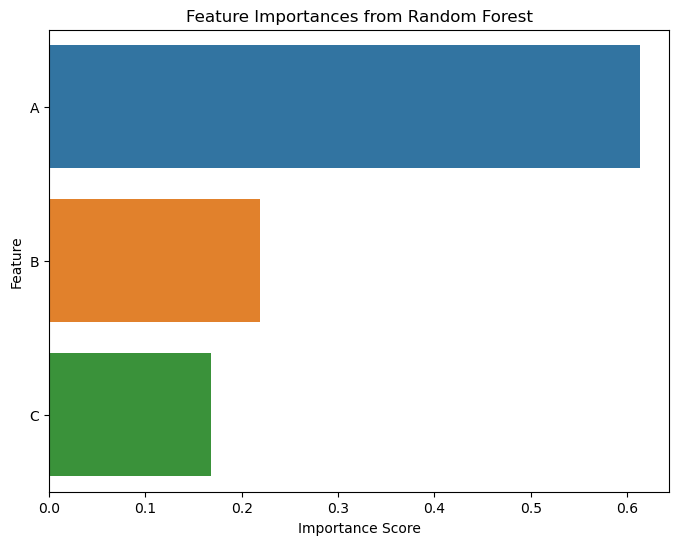

In [1]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define Factors and Levels
# For simplicity, we'll consider three factors/features: A, B, and C
# Each factor has two levels: Low (-1) and High (1)

factors = {
    'A': [-1, 1],
    'B': [-1, 1],
    'C': [-1, 1]
}

# Step 2: Generate Full Factorial Design
# Create all possible combinations of factor levels

factor_levels = list(factors.values())
full_factorial_design = pd.DataFrame(list(product(*factor_levels)), columns=factors.keys())

print("Full Factorial Design:")
print(full_factorial_design)

# Step 3: Simulate Response Variable
# Define a function that simulates the response variable based on the factors
# Include main effects and interaction effects

def simulate_response(row):
    y = (5 * row['A']) + (3 * row['B']) + (2 * row['C']) \
        + (4 * row['A'] * row['B']) - (2 * row['A'] * row['C']) \
        + np.random.normal(0, 1)  # Adding some noise
    return y

def calculate_mse(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE)
    
    :param actual: list of actual values
    :param predicted: list of predicted values
    :return: MSE
    """
    # Ensure actual and predicted lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Input lists must have the same length")
    
    # Calculate MSE
    n = len(actual)
    sum_squared_errors = sum([(a - p) ** 2 for a, p in zip(actual, predicted)])
    mse = sum_squared_errors / n
    return mse

full_factorial_design['Y'] = full_factorial_design.apply(simulate_response, axis=1)

print("\nData with Response Variable:")
print(full_factorial_design)

# Step 4: Split Data into Training and Testing Sets

X = full_factorial_design[['A', 'B', 'C']]
y = full_factorial_design['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Machine Learning Model
# Using Random Forest Regressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model (Optional)
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
mse = calculate_mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance on Test Set:\nMSE: {mse:.2f}, R2 Score: {r2:.2f}")

# Step 6: Feature Selection and Importance

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Visualize Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# <a id='toc2_'></a>[Factorial Experiments: Two Factors](#toc0_)

##### Suppose we have two factors/parameters which are  being varied in the experiment
- e.g., temperature and altitude (control variable)
- e.g., current (response variable)

The traditional method is to hold one parameter constant, vary the other parameter, and measure the effect on the response variable.

In general, hold all factors constant except for one, take the measurement, and then do this for several levels of this one factor.



<img src="images/Screenshot 2024-10-24 at 12.56.51 PM.png" width="740" height="638" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />


#### <a id='toc3_1_2_1_'></a>[Alternative Arrangement: Factorial](#toc0_)

We can combine each temperature level with each altitude, and then only four experiments are run.

- One estimate of temperature effect on current is 30 mA @ 0 m

- Another estimate is 20 mA @1000m

- Average estimate is 25 mA (Main Effect of B)

- The two estimates of altitude effect are  -30  and -40 mA at 25 and 55C, respectively.

- The average estimate is -35 mA (Main Effect of A)

**Hence, with just four observations valid comparisons have been made for both temp and altitude**



<img src="images/Screenshot 2024-10-24 at 1.03.02 PM.png" width="640" height="526" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />

### <a id='toc3_1_2_'></a>[DOE Advantages](#toc0_)

- **More efficiency than with one factor at a time experiments**

- **All data are used in computing both effects**

- **Some information is gleaned on possible interactions between two factors (e.g., the increase of 20mA @ 1K was roughly the same magnitude of 30mA @ 0K. If these increases had differed considerably, an interaction might be present)**

- **These advantages will be more pronounced as the number of levels of the two factors is increased**


- A factorial experiment is one in which all levels of a given factor are combined with all levels of every other factor in the experiment.

or

- in each complete trial or replication of the experiment all possible combinations of the levels of the factors are investigated.

- For example, if there exist “a” levels of factor A and “b” levels for factor B, then each replicate contains all “ab” treatment combinations.

By a Factorial Experiment we mean that in each complete trial or replicate of the experiment all possible combinations of the levels of the factors are investigation


### <a id='toc3_1_2_'></a>[Interactions between Factors](#toc0_)

- To indicate an interaction between factors A and B, graphs are useful in interpreting significant interactions and reporting result to an upper-level manager who may not fully understand statistics.

- The solid curves on the right would indicate no interaction between factors A and B

- An interaction would occur if the two lines cross as factor A is increased from (1) to (2) – Red Dash line with solid black line



<img src="images/Screenshot 2024-10-25 at 10.15.12 AM.png" width="740" height="690" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />


<img src="images/Screenshot 2024-10-25 at 10.15.33 AM.png" width="940" height="763" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />

- **The effect of a factor is defined as the change in response by a change in the level of the factor.**
- **Its is called a “main effect” because it refers to the primary factors in the study; lets consider the data in the following table above**


In a **_"factorial design"_**, the effects of varying the levels of the various factors affecting the process output is investigated. Each complete trial or replication of the experiment takes into account all the possible combinations of the varying levels of these factors.

Effective factorial design ensures that the least number of experiment runs are conducted to generate the maximum amount of information about how input variables affect the output of a process.

For instance, if the effects of two factors A and B on the output of a process are investigated, and A has 3 levels of intensity (e.g., weak, moderate, and strong presence) while B has 2 levels (weak and strong), then one would need to run 6 treatment combinations to complete the experiment, observing the process output for each of the combinations:

 1)weak(A)-weak(B),2)weak(A)-strong(B),3)moderate(A)-weak(B), 4)moderate(A)-strong(B), 5)strong(A)-weak(B),6) strong(A)-strong(B).


The amount of change produced in the process output for a change in the **_'level'_** of a given factor is referred to as the **_'main effect'_** of that factor. Table 1 shows an example of a simple factorial experiment involving two factors with two levels each.

The two levels of each factor may be denoted as 'low' and 'high', which are usually symbolized by '-' and '+' in factorial designs, respectively.


<img src="images/Screenshot 2024-10-25 at 10.25.49 AM.png" width="740" height="468" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />